In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rc('text', usetex=True)

# Read Noise2Seg Results

In [2]:
def get_measure(pre, exp, run=1, fraction=0.5, measure='SEG', score_type='validation_'):
    with open('/home/tibuch/Noise2Seg/experiments/{}_{}_run{}/fraction_{}/{}scores.csv'.format(pre, exp, run, fraction, score_type)) as f:
        line = f.readline()
        while line:
            line = line.strip().split(',')
            if line[0] == measure:
                return float(line[1])
            line = f.readline()
    return None

In [3]:
def read_Noise2Seg_results(pre, exp, measure='SEG', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='validation_'):
    
    stats = []
    
    for frac in fractions:
        scores = []
        for r in runs:
            scores.append(get_measure(pre, exp, run=r, fraction=frac, measure=measure, score_type=score_type))
        
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
    
    return np.array(stats)

# Fraction to #Images

In [4]:
def fraction_to_abs(fracs, max_num_imgs=3800):
    return np.round(max_num_imgs*fracs/100)

In [5]:
fraction_to_abs(8)

304.0

# DSB2018 n0: SEG scores on validation data

* alpha_0.7_dsb_n0_run5/fraction_1.0
* alpha_0.8_dsb_n0_run1/fraction_1.0
* alpha_0.8_dsb_n0_run1/fraction_32.0
* alpha_0.8_dsb_n0_run4/fraction_16.0


In [6]:
joint_alpha0_1_dsb_n0 = read_Noise2Seg_results('alpha0.1', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_2_dsb_n0 = read_Noise2Seg_results('alpha0.2', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_3_dsb_n0 = read_Noise2Seg_results('alpha0.3', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_4_dsb_n0 = read_Noise2Seg_results('alpha0.4', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_5_dsb_n0 = read_Noise2Seg_results('alpha0.5', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_6_dsb_n0 = read_Noise2Seg_results('alpha0.6', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_7_dsb_n0 = read_Noise2Seg_results('alpha0.7', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_8_dsb_n0 = read_Noise2Seg_results('alpha0.8', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

joint_alpha0_9_dsb_n0 = read_Noise2Seg_results('alpha0.9', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [7]:
def get_best_alphas_for_fractions(exps, fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0],
                                    alpha_strs = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9']):
    scores = []
    sems = []
    alphas = []

    for i in fractions:
        best_score = 0.0
        best_sem = 0.0
        best_alpha = ''
        for num, exp in enumerate(exps):

            for j in range (exp.shape[0]):
                if(exp[j][0]==i):
                    score = exp[j][1]
                    corresponding_sem = exp[j][2]
                    corresponding_alpha = alpha_strs[num]
                    break
            if(score > best_score):
                best_score = score
                best_sem = corresponding_sem
                best_alpha = corresponding_alpha

        scores.append(best_score)
        sems.append(best_sem)
        alphas.append(best_alpha)
        
    return np.array(scores), np.array(sems), alphas

In [8]:
fractions = np.array([0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])
best_scores, best_sems, best_alphas = get_best_alphas_for_fractions(exps=[joint_alpha0_1_dsb_n0, joint_alpha0_2_dsb_n0, joint_alpha0_3_dsb_n0, joint_alpha0_4_dsb_n0, joint_alpha0_5_dsb_n0, joint_alpha0_6_dsb_n0, joint_alpha0_7_dsb_n0, joint_alpha0_8_dsb_n0, joint_alpha0_9_dsb_n0],
                                                                  fractions=fractions)

In [9]:
baseline_dsb_n0 = read_Noise2Seg_results('fin', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

sequential_dsb_n0 = read_Noise2Seg_results('finSeq', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

best_joint_dsb_n0_scores = []
best_joint_dsb_n0_sems = []

for i in range(len(best_alphas)):
    t = read_Noise2Seg_results('alpha'+best_alphas[i], 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[fractions[i]], score_type = '')
    best_joint_dsb_n0_scores.append(t[0,1])
    best_joint_dsb_n0_sems.append(t[0,2])
    
best_joint_dsb_n0_scores = np.array(best_joint_dsb_n0_scores)
best_joint_dsb_n0_sems = np.array(best_joint_dsb_n0_sems)

In [10]:
test_joint_alpha0_5_dsb_n0 = read_Noise2Seg_results('alpha0.5', 'dsb_n0', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type='')

In [11]:
plt.rc('font', family = 'serif', size = 20)

In [12]:
def cm2inch(*tupl, scale=3):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(scale * i/inch for i in tupl[0])
    else:
        return tuple(scale * i/inch for i in tupl)

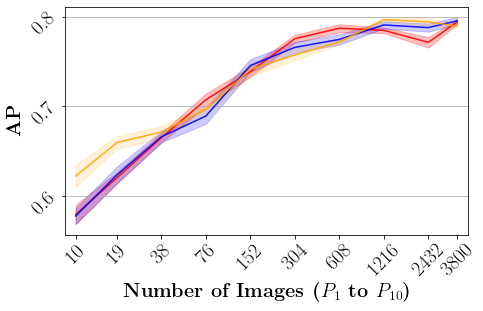

In [13]:
fig = plt.figure(figsize=cm2inch(12.2/2,4)) # 12.2cm is the text-widht of the MICCAI template

plt.plot(fraction_to_abs(baseline_dsb_n0[:, 0], max_num_imgs = 3800), 
         baseline_dsb_n0[:, 1],
         color = 'red', alpha = 0.9)
plt.fill_between(fraction_to_abs(baseline_dsb_n0[:, 0], max_num_imgs = 3800), 
                 y1 = baseline_dsb_n0[:, 1] + baseline_dsb_n0[:, 2], 
                 y2 = baseline_dsb_n0[:, 1] - baseline_dsb_n0[:, 2], 
                 color = 'red', alpha = 0.25, label = 'Baseline')

plt.plot(fraction_to_abs(sequential_dsb_n0[:, 0], max_num_imgs = 3800), 
         sequential_dsb_n0[:, 1],
         color = 'blue', alpha = 0.9)
plt.fill_between(fraction_to_abs(sequential_dsb_n0[:, 0], max_num_imgs = 3800), 
                 y1 = sequential_dsb_n0[:, 1] + sequential_dsb_n0[:, 2], 
                 y2 = sequential_dsb_n0[:, 1] - sequential_dsb_n0[:, 2], 
                 color = 'blue', alpha = 0.2, label = 'Baseline Sequential')

plt.plot(fraction_to_abs(fractions, max_num_imgs = 3800), 
         best_joint_dsb_n0_scores,
         color = 'orange', alpha = 0.9)
plt.fill_between(fraction_to_abs(fractions, max_num_imgs = 3800), 
                 y1 = best_joint_dsb_n0_scores + best_joint_dsb_n0_sems, 
                 y2 = best_joint_dsb_n0_scores - best_joint_dsb_n0_sems, 
                 color = 'orange', alpha = 0.15, label = r'\textbf{Joint-Loss (Ours)}')

plt.semilogx()
# plt.legend(loc = 'lower right')

plt.ylabel(r'\textbf{AP}')
plt.xlabel(r'\textbf{Number of Images ($P_1$ to $P_{10}$)}')

plt.grid(axis='y')

plt.xticks(ticks=fraction_to_abs(fractions, max_num_imgs = 3800), 
           labels=fraction_to_abs(fractions, max_num_imgs = 3800).astype(np.int),
           rotation=45)
plt.minorticks_off()

plt.yticks(rotation=45)

plt.xlim([8.5, 4500])

plt.tight_layout();

plt.savefig('AP_n0_area.pdf', pad_inches=0.0);
plt.savefig('AP_n0_area.svg', pad_inches=0.0);